In [1]:
import os
import sys
import numpy as np
import h5py

import scipy.io as sio


def load_mat_file(path):
    if not os.path.exists(path):
        raise FileNotFoundError(f"MAT file not found: {path}")
    try:
        # Try standard scipy loader (works for v7.2 and earlier)
        data = sio.loadmat(path, squeeze_me=True, struct_as_record=False)
    except NotImplementedError:
        # scipy can't read v7.3 (HDF5) files; fall back to h5py
        data = {}
        with h5py.File(path, 'r') as f:
            # collect datasets (top-level)
            def collect(name, obj):
                if isinstance(obj, h5py.Dataset):
                    try:
                        data[name] = obj[()]
                    except Exception:
                        data[name] = None
            f.visititems(collect)
    # filter out MATLAB meta-keys
    keys = [k for k in data.keys() if not k.startswith("__")]
    print("Loaded keys:", keys)
    return data


In [2]:
LS_NMSE_val_source = []
LS_NMSE_val_target = []
for SNR in range(-5, 30, 5):
    mat_path = f"{SNR}dB/GAN_ls/performance.mat"
    data = load_mat_file(mat_path)
    LS_NMSE_val_source.append(data['nmse_val_source'][-1])
    LS_NMSE_val_target.append(data['nmse_val_target'][-1])

Loaded keys: ['train_loss', 'train_est_loss', 'train_disc_loss', 'train_domain_loss', 'train_est_loss_target', 'val_est_loss', 'val_est_loss_source', 'val_loss', 'val_est_loss_target', 'val_gan_disc_loss', 'val_domain_disc_loss', 'source_acc', 'target_acc', 'acc', 'nmse_val_source', 'nmse_val_target', 'nmse_val', 'pad_pca_svm', 'pad_pca_lda', 'pad_pca_logreg', 'epoc_pad', 'pad_svm']
Loaded keys: ['train_loss', 'train_est_loss', 'train_disc_loss', 'train_domain_loss', 'train_est_loss_target', 'val_est_loss', 'val_est_loss_source', 'val_loss', 'val_est_loss_target', 'val_gan_disc_loss', 'val_domain_disc_loss', 'source_acc', 'target_acc', 'acc', 'nmse_val_source', 'nmse_val_target', 'nmse_val', 'pad_pca_svm', 'pad_pca_lda', 'pad_pca_logreg', 'epoc_pad', 'pad_svm']
Loaded keys: ['train_loss', 'train_est_loss', 'train_disc_loss', 'train_domain_loss', 'train_est_loss_target', 'val_est_loss', 'val_est_loss_source', 'val_loss', 'val_est_loss_target', 'val_gan_disc_loss', 'val_domain_disc_loss'

In [3]:
LI_NMSE_val_source = []
LI_NMSE_val_target = []
for SNR in range(-5, 30, 5):
    if SNR != 10:
        mat_path = f"{SNR}dB/GAN_linear/performance.mat"
        data = load_mat_file(mat_path)
        LI_NMSE_val_source.append(data['nmse_val_source'][-1])
        LI_NMSE_val_target.append(data['nmse_val_target'][-1])
    else:
        LI_NMSE_val_source.append(1.09879281750092139)
        LI_NMSE_val_target.append(1.6794404697418213)

Loaded keys: ['train_loss', 'train_est_loss', 'train_disc_loss', 'train_domain_loss', 'train_est_loss_target', 'val_est_loss', 'val_est_loss_source', 'val_loss', 'val_est_loss_target', 'val_gan_disc_loss', 'val_domain_disc_loss', 'source_acc', 'target_acc', 'acc', 'nmse_val_source', 'nmse_val_target', 'nmse_val', 'pad_pca_svm', 'pad_pca_lda', 'pad_pca_logreg', 'epoc_pad', 'pad_svm']
Loaded keys: ['train_loss', 'train_est_loss', 'train_disc_loss', 'train_domain_loss', 'train_est_loss_target', 'val_est_loss', 'val_est_loss_source', 'val_loss', 'val_est_loss_target', 'val_gan_disc_loss', 'val_domain_disc_loss', 'source_acc', 'target_acc', 'acc', 'nmse_val_source', 'nmse_val_target', 'nmse_val', 'pad_pca_svm', 'pad_pca_lda', 'pad_pca_logreg', 'epoc_pad', 'pad_svm']
Loaded keys: ['train_loss', 'train_est_loss', 'train_disc_loss', 'train_domain_loss', 'train_est_loss_target', 'val_est_loss', 'val_est_loss_source', 'val_loss', 'val_est_loss_target', 'val_gan_disc_loss', 'val_domain_disc_loss'

In [4]:
# Add the helper directory using relative path
sys.path.append('../../../helper')
import plotfig

2025-10-20 15:24:56.466079: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1760988296.480261  165872 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1760988296.484798  165872 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1760988296.496054  165872 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1760988296.496067  165872 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1760988296.496069  165872 computation_placer.cc:177] computation placer alr

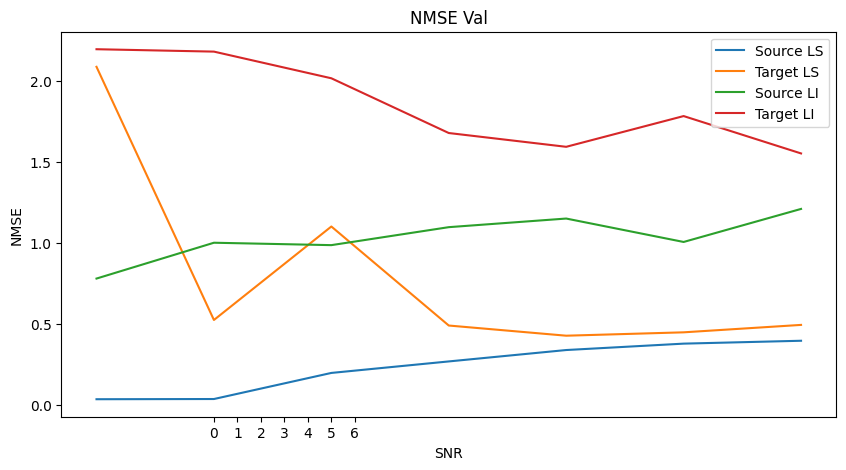

<Figure size 640x480 with 0 Axes>

In [5]:
x = np.arange(-5, 30, 5)
plotfig.figLoss(x=x,line_list=[(LS_NMSE_val_source, 'Source LS'), (LS_NMSE_val_target, 'Target LS'), (LI_NMSE_val_source, 'Source LI'), (LI_NMSE_val_target, 'Target LI')], xlabel='SNR', ylabel='NMSE',
                        title='NMSE Val', fig_show=True, fig_name='Loss')

In [ ]:
note_dir = notebook_dir = os.getcwd()

path_temp = os.path.abspath(os.path.join(note_dir, '..', '..', '..', '..', 'generatedChan/MATLAB/tdlA_tdlC'))
print(path_temp)

'/home/thien/Code/NTN/Hest_NTN_UDA/Domain_Adversarial/model/GAN_calcu/tdlA_tdlC'

Loaded keys: ['H_perfect_original']


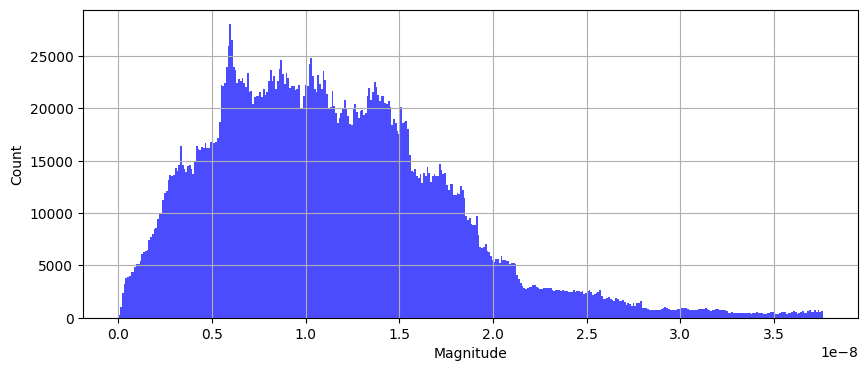

<Figure size 640x480 with 0 Axes>

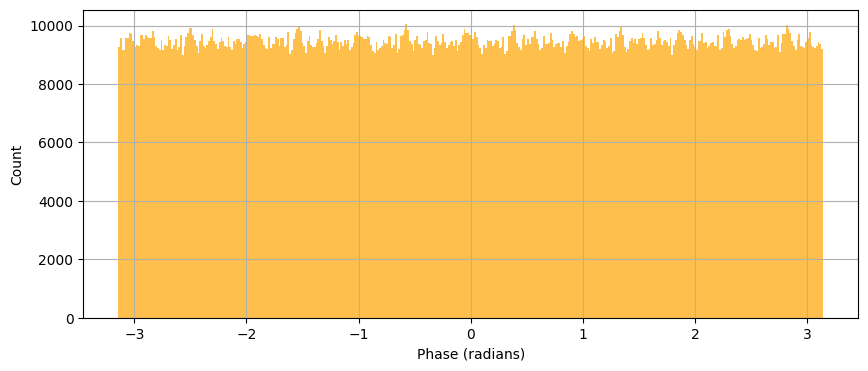

<Figure size 640x480 with 0 Axes>

In [14]:
H_ori_A = load_mat_file(f'{path_temp}/tdlA/H_perfect_original.mat')['H_perfect_original']
plotfig.plotHist(H_ori_A, fig_show = True)

Loaded keys: ['H_li', 'H_ls', 'H_perfect', 'H_prac', 'nmse_li', 'nmse_ls', 'nmse_prac']


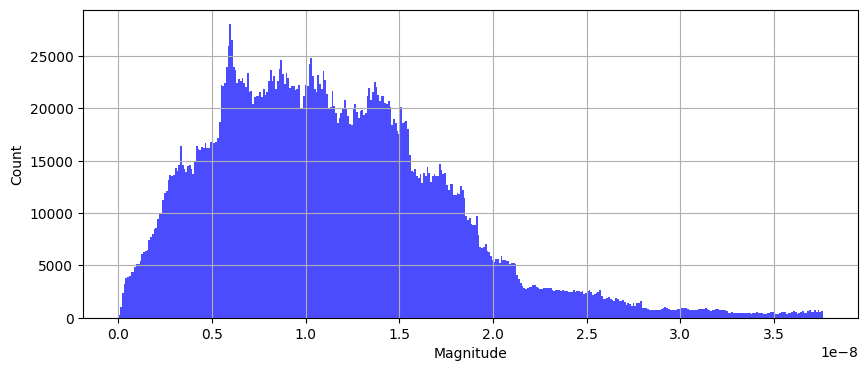

<Figure size 640x480 with 0 Axes>

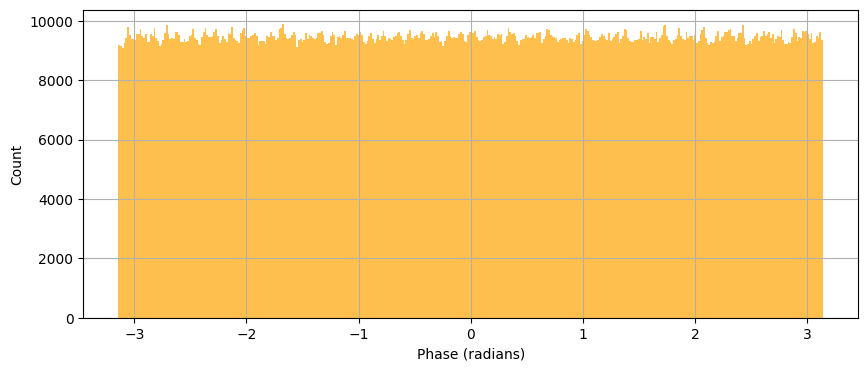

<Figure size 640x480 with 0 Axes>

In [ ]:
H_comp_A = load_mat_file(f'{path_temp}/tdlA/matlabNTN.mat')['H_perfect']
plotfig.plotHist(H_comp_A, fig_show = True, save_path=f'{path_temp}/tdlA/', name='distA')


Loaded keys: ['H_perfect_original']


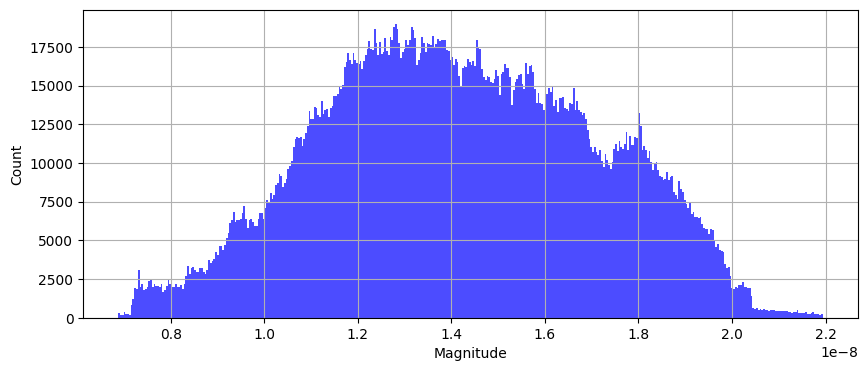

<Figure size 640x480 with 0 Axes>

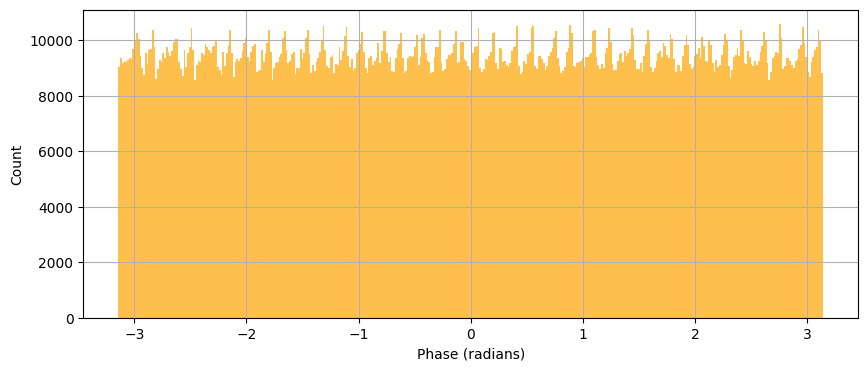

<Figure size 640x480 with 0 Axes>

In [23]:
H_ori_C = load_mat_file(f'{path_temp}/tdlC/H_perfect_original.mat')['H_perfect_original']
plotfig.plotHist(H_comp_C, fig_show = True, save_path=f'{path_temp}/tdlC/', name='distC')



Loaded keys: ['H_li', 'H_ls', 'H_perfect', 'H_prac', 'nmse_li', 'nmse_ls', 'nmse_prac']


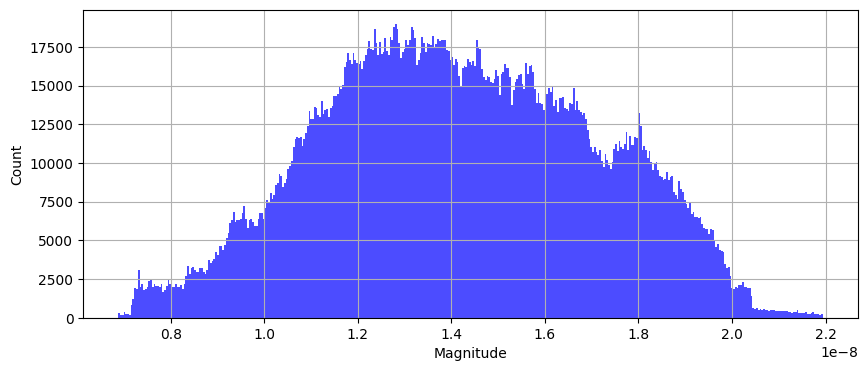

<Figure size 640x480 with 0 Axes>

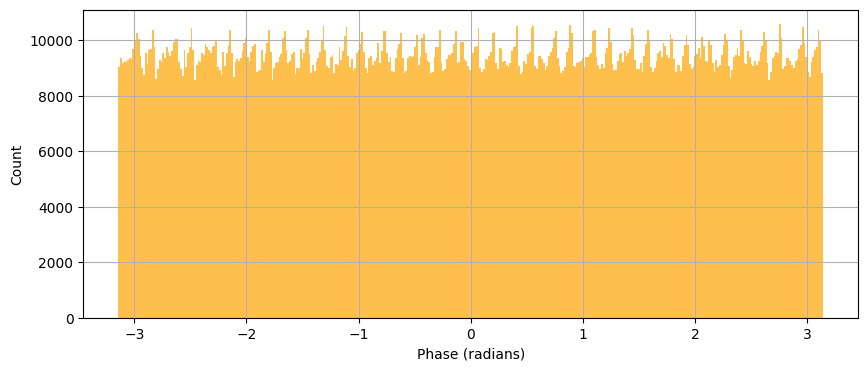

<Figure size 640x480 with 0 Axes>

In [17]:
H_comp_C = load_mat_file(f'{path_temp}/tdlC/matlabNTN.mat')['H_perfect']
plotfig.plotHist(H_comp_C, fig_show = True)

In [18]:
plotfig.wasserstein_approximate(H_comp_A, H_comp_C)

0.00013289891758156593

In [21]:
wd = plotfig.wasserstein_magnitude_only(H_comp_A, H_comp_C)

In [24]:
wd

np.float64(3.808380632395117e-09)

In [25]:
import numpy as np
from scipy.stats import wasserstein_distance
def to_complex(x):
    x = np.asarray(x)
    # already complex
    if np.issubdtype(x.dtype, np.complexfloating):
        return x
    # compound dtype with fields (e.g., 'real','imag')
    if x.dtype.names:
        names = {n.lower(): n for n in x.dtype.names}
        r = x[names.get('real', x.dtype.names[0])]
        i = x[names.get('imag', x.dtype.names[1])]
        return r.astype(np.float64) + 1j * i.astype(np.float64)
    # raw void of two floats → reinterpret as complex128
    if np.issubdtype(x.dtype, np.void):
        try:
            return x.view(np.complex128).reshape(x.shape)
        except Exception:
            pass
    # last-dim=2 layout [real, imag]
    if x.ndim >= 1 and x.shape[-1] == 2 and np.issubdtype(x.dtype, np.floating):
        return x[..., 0] + 1j * x[..., 1]
    # fallback: treat as real
    return x.astype(np.complex128)

H_comp_A = to_complex(H_comp_A)
H_comp_C = to_complex(H_comp_C)


In [26]:

mA = np.abs(H_comp_A).ravel().astype(float)
mC = np.abs(H_comp_C).ravel().astype(float)

# wd = wasserstein_distance(mA, mC)

comb = np.concatenate([mA, mC])
rng = comb.max() - comb.min()
mean = comb.mean()
std = comb.std()
q25, q75 = np.percentile(comb, [25, 75])
iqr = q75 - q25
dmean = abs(mA.mean() - mC.mean())

print(f"Wasserstein: {wd:.3e}")
print(f"WD / range: {wd/rng:.3f}")
print(f"WD / mean:  {wd/mean:.3f}")
print(f"WD / std:   {wd/std:.3f}")
print(f"WD / IQR:   {wd/iqr:.3f}")
print(f"|Δ means|:   {dmean:.3e}  (for reference)")

Wasserstein: 3.808e-09
WD / range: 0.101
WD / mean:  0.298
WD / std:   0.751
WD / IQR:   0.609
|Δ means|:   2.800e-09  (for reference)
